In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')

In [3]:
# Calculating each user average rating
userRatingDist = rating.groupby(['user_id']).mean().reset_index()
#userRatingDist.columns = ['user_id', 'average_rating_score']

In [4]:
URD1 = pd.merge(anime,rating,on=['anime_id','anime_id'])
URD2 = pd.merge(URD1,userRatingDist,on=['user_id','user_id'])
URD2= URD2[URD2.user_id <= 10000]

In [5]:
URD2 = URD2.drop(columns=["anime_id_y"])
URD2 = URD2.rename(columns = {"anime_id_x":"anime_id","rating_x":"overall_rating","rating_y":"user_rating","rating":"user_avg_rating"})

In [6]:
user_anime2 = pd.pivot_table(
    URD2,values="user_rating",
    index="user_id",
    columns="name"
)

In [7]:
user_anime3 = user_anime2.fillna(0)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(user_anime3)
pca_samples = pca.transform(user_anime3)

In [9]:
user_gp = pd.DataFrame(pca_samples)
user_gp.head()

,0,1,2
0,-21.112792,-2.446000,1.230777
1,-18.533342,-3.024162,2.530636
2,4.884069,-14.540310,-14.953942
3,-20.909953,-2.604146,3.173153
4,28.486885,-8.663860,-1.749477


In [10]:
distortions = []
K = []
for i in range(2,10):
    model = KMeans(n_clusters=i)
    model.fit(user_gp)
    distortions.append(model.inertia_)
    K.append(i)

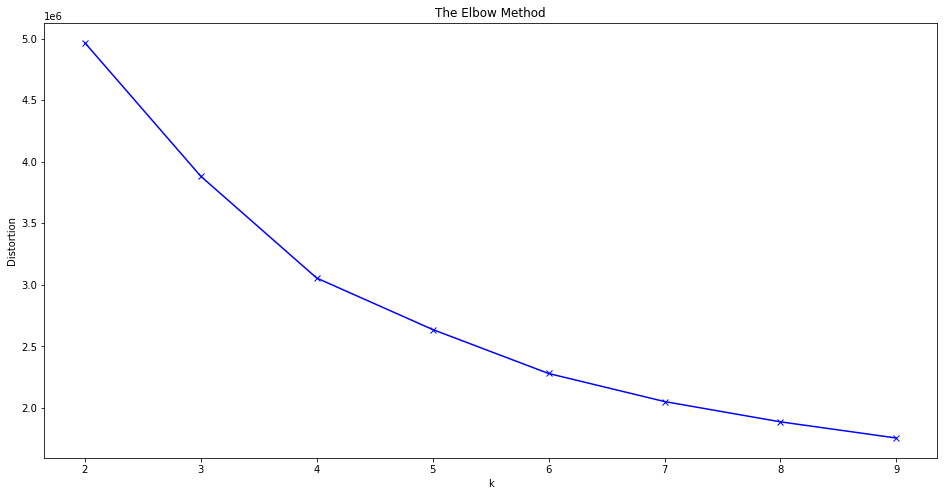

In [11]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

In [12]:
clstr = KMeans(n_clusters=6,random_state=0).fit(user_gp)
centroid = clstr.cluster_centers_
cntrd_preds = clstr.predict(user_gp)

print(centroid)

[[ 47.25937768 -24.7425011    2.75125727]
 [-14.48288496  -1.76206248   1.4026252 ]
 [ 12.38015619  -9.5135417   -6.52882097]
 [ 37.29831155  32.05923095   2.95885568]
 [105.9508213    1.81689895  14.74443344]
 [  0.9131605   14.1704547   -1.96236071]]


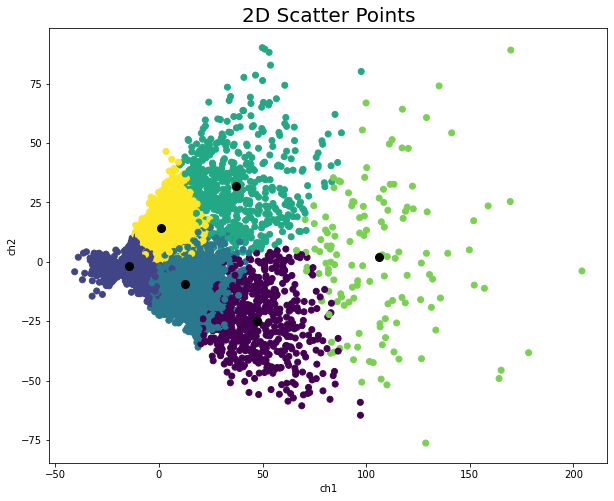

In [13]:
fig = plt.figure(figsize=(10,8))
plt.scatter(user_gp[0],user_gp[1],c = cntrd_preds)
for ci,c in enumerate(centroid):
    plt.plot(c[0], c[1], 'o', markersize=8, color='black', alpha=1)

plt.xlabel('ch1')
plt.ylabel('ch2')

plt.title('2D Scatter Points', fontsize=20)
plt.show()

In [14]:
user_anime3['cluster'] = cntrd_preds

# Clusters

In [15]:
## Calculating each anime overall user rating within each cluster

In [16]:
c0 = user_anime3[user_anime3['cluster']==0].drop('cluster',axis=1).mean()
c1 = user_anime3[user_anime3['cluster']==1].drop('cluster',axis=1).mean()
c2 = user_anime3[user_anime3['cluster']==2].drop('cluster',axis=1).mean()
c3 = user_anime3[user_anime3['cluster']==3].drop('cluster',axis=1).mean()
c4 = user_anime3[user_anime3['cluster']==4].drop('cluster',axis=1).mean()
c5 = user_anime3[user_anime3['cluster']==5].drop('cluster',axis=1).mean()

In [17]:
df0 = pd.DataFrame(c0).reset_index().sort_values(by=[0], ascending = False)
df1 = pd.DataFrame(c1).reset_index().sort_values(by=[0], ascending = False)
df2 = pd.DataFrame(c2).reset_index().sort_values(by=[0], ascending = False)
df3 = pd.DataFrame(c3).reset_index().sort_values(by=[0], ascending = False)
df4 = pd.DataFrame(c4).reset_index().sort_values(by=[0], ascending = False)
df5 = pd.DataFrame(c5).reset_index().sort_values(by=[0], ascending = False)

In [18]:
df0 = df0.reset_index(drop=True).rename({0:"score"},axis = 1)
df1 = df1.reset_index(drop=True).rename({0:"score"},axis = 1)
df2 = df2.reset_index(drop=True).rename({0:"score"},axis = 1)
df3 = df3.reset_index(drop=True).rename({0:"score"},axis = 1)
df4 = df4.reset_index(drop=True).rename({0:"score"},axis = 1)
df5 = df5.reset_index(drop=True).rename({0:"score"},axis = 1)

# Recommendation Results

In [19]:
def res(x):
    sc0 = df0.score[df0["name"] == x].tolist()
    sc1 = df1.score[df1["name"] == x].tolist()
    sc2 = df2.score[df2["name"] == x].tolist()
    sc3 = df3.score[df3["name"] == x].tolist()
    sc4 = df4.score[df4["name"] == x].tolist()
    sc5 = df5.score[df5["name"] == x].tolist()

    y = max(sc0, sc1, sc2, sc3, sc4, sc5)
    score=[sc0[0], sc1[0], sc2[0], sc3[0], sc4[0], sc5[0]]
    rcmd = {
        sc0[0]:df0,
        sc1[0]:df1,
        sc2[0]:df2,
        sc3[0]:df3,
        sc4[0]:df4,
        sc5[0]:df5
    }
    rcmd1 = {
        0:df0,
        1:df1,
        2:df2,
        3:df3,
        4:df4,
        5:df5
    }
    rcmd[y[0]]

    index = rcmd[y[0]].index[rcmd[y[0]]["name"] == x].tolist()

    list_name=[]
    index1=index[0]
    if index1 >=5 and index1<=(len(rcmd1[score.index(max(score))])-5):
        list_name.append(rcmd1[score.index(max(score))]['name'][(index1-5):index1])
        list_name.append(rcmd1[score.index(max(score))]['name'][index1+1:(index1+6)])
    elif index1 <5:
        list_name.append(rcmd1[score.index(max(score))]['name'][0:index1])
        list_name.append(rcmd1[score.index(max(score))]['name'][index1+1:11])
    else:
        list_name.append(rcmd1[score.index(max(score))]['name'][index1+1:len(rcmd1[score.index(max(score))])])
        list_name.append(rcmd1[score.index(max(score))]['name'][len(rcmd1[score.index(max(score))])-11: index1])

    rec_results = pd.DataFrame(list_name[0].tolist() + list_name[1].tolist(),columns = ["Recommended"])
    print(rec_results)

In [20]:
# test example: Kiseijuu: Sei no Kakuritsu
x = input()
res(x)

                                       Recommended
0  Mondaiji-tachi ga Isekai kara Kuru Sou Desu yo?
1                                         Sankarea
2                             Amagi Brilliant Park
3                                   Kimi ni Todoke
4                                           K-On!!
5                                       Usagi Drop
6                                  Higashi no Eden
7                                          Btooom!
8           Fate/stay night: Unlimited Blade Works
9                               Sora no Otoshimono
